In [14]:
import numpy as np
import itk
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [15]:
# Using a numpy array as sample with measurement vectors
sample = np.array([[1.0, 2.0, 4.0], [2.0, 4.0, 5.0], [3.0, 8.0, 6.0]])

for i, vector in enumerate(sample):
    print(f"Measurement Vector {i} - {vector}")


Measurement Vector 0 - [1. 2. 4.]
Measurement Vector 1 - [2. 4. 5.]
Measurement Vector 2 - [3. 8. 6.]


Point Sets

In [16]:
PointSetType = itk.PointSet[itk.F, 3]  # 3D PointSet with floating point Pixel type

point_set = PointSetType.New()
point_values = {}

#Define points with values
point = itk.Point[itk.F, 3]()

point[0], point[1], point[2] = 1.0, 2.0, 3.0
point_set.SetPoint(0, point)

point[0], point[1], point[2] = 2.0, 4.0, 6.0
point_set.SetPoint(1, point)

point[0], point[1], point[2] = 3.0, 6.0, 9.0
point_set.SetPoint(2, point)

points = [] #numpy array used as the sample
for i in range(point_set.GetNumberOfPoints()):
    pt = point_set.GetPoint(i)
    points.append([pt[0], pt[1], pt[2]])

points_array = np.array(points)

print("Points in numpy array") 
print(points_array)

Points in numpy array
[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]


Joint Domain

In [17]:
Dimension = 2
PixelType = itk.F  # Float type
ImageType = itk.Image[PixelType, Dimension]

input_image_path = 'images\\BrainProtonDensitySlice.png'  
image = itk.imread(input_image_path, itk.UC)

# List to store pixel values and coordinates
pixel_data = []

size = image.GetLargestPossibleRegion().GetSize()

for y in range(size[1]):
        for x in range(size[0]):
            index = [x, y]
            pixel_value = image.GetPixel(index)
            coord = np.array(image.TransformIndexToPhysicalPoint(index))
            pixel_data.append((coord, pixel_value))

# Iterate to access both pixel values and coordinates
for coord, pixel_value in pixel_data[:10]:
    print("Coordinates = ", coord, "Pixel Values = ", pixel_value)

Coordinates =  [0. 0.] Pixel Values =  1
Coordinates =  [1. 0.] Pixel Values =  10
Coordinates =  [2. 0.] Pixel Values =  17
Coordinates =  [3. 0.] Pixel Values =  10
Coordinates =  [4. 0.] Pixel Values =  19
Coordinates =  [5. 0.] Pixel Values =  12
Coordinates =  [6. 0.] Pixel Values =  5
Coordinates =  [7. 0.] Pixel Values =  4
Coordinates =  [8. 0.] Pixel Values =  11
Coordinates =  [9. 0.] Pixel Values =  14


Mean and Covariance calculations

In [18]:
# Create a NumPy array with measurement vectors
sample = np.array([[1.0, 2.0, 4.0], [2.0, 4.0, 5.0], [3.0, 8.0, 6.0], [2.0, 7.0, 4.0], [3.0, 2.0, 7.0]])

# Compute the mean
mean = np.mean(sample, axis=0)
print("Mean = ", mean)

# Compute the covariance
covariance = np.cov(sample, rowvar=False)
print("Covariance = ")
print(covariance)


Mean =  [2.2 4.6 5.2]
Covariance = 
[[ 0.7   0.85  0.95]
 [ 0.85  7.8  -0.4 ]
 [ 0.95 -0.4   1.7 ]]


In [19]:
# Create numpy array with measurement vectors
sample = np.array([[1.0, 2.0, 4.0], [2.0, 4.0, 5.0], [3.0, 8.0, 6.0], [2.0, 7.0, 4.0], [3.0, 2.0, 7.0]])

# Define the weight array
weights = np.array([0.5, 0.5, 0.01, 0.5, 0.01])

# Weighted mean calculation
weighted_mean = np.average(sample, axis=0, weights=weights)
print("Weighted Mean = ", weighted_mean)

# Weighted covariance calculation
centered_sample = sample - weighted_mean
covariance = np.dot(weights * centered_sample.T, centered_sample) / np.sum(weights)
print("Weighted Covariance = ")
print(covariance)


Weighted Mean =  [1.68421053 4.34210526 4.36184211]
Weighted Covariance = 
[[ 0.24238227  0.77908587  0.14716066]
 [ 0.77908587  4.29085873 -0.11063019]
 [ 0.14716066 -0.11063019  0.28354398]]


Euclidian Distance

In [20]:
# Defining the measurement vectors
origin_point = np.array([1.0, 2.0])
point1 = np.array([2.0, 6.0])
point2 = np.array([4.0, 11.0])

# Calculate the Euclidean distance between pointA and pointB
distance1 = np.linalg.norm(point1 - origin_point)
distance2 = np.linalg.norm(point2 - origin_point)

print(f"Euclidean Distance between origin and point1 = ", distance1)
print(f"Euclidean Distance between origin and point2 = ", distance2)


Euclidean Distance between origin and point1 =  4.123105625617661
Euclidean Distance between origin and point2 =  9.486832980505138


Histograms

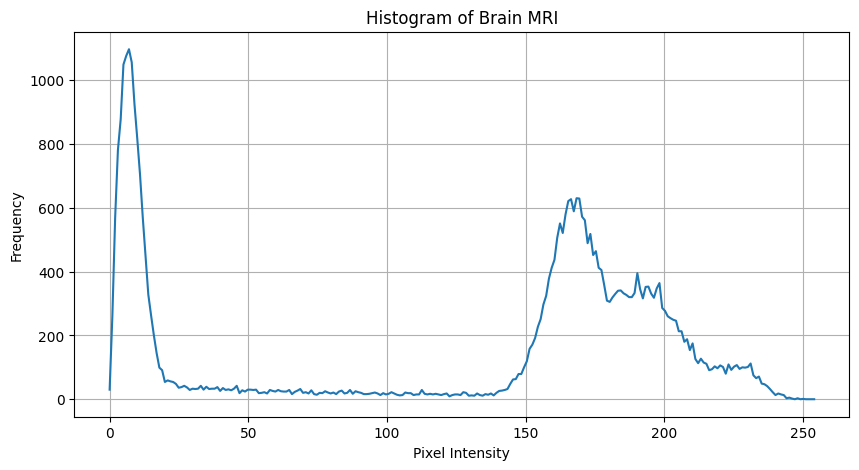

In [21]:
PixelType = itk.UC  # Unsigned Char
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]

# Read the input image
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName('images/BrainProtonDensitySlice.png')
reader.Update()

# Get the image data as a numpy array
image_np = itk.array_from_image(reader.GetOutput())

# Compute the histogram
histogram, bin_edges = np.histogram(image_np, bins=256, range=(0, 255))

# for i in range(10):
#     print(f"Bin {i}: Frequency = {histogram[i]}")

# Plot the histogram using matplotlib

plt.figure(figsize=(10, 5))
plt.plot(bin_edges[0:-1], histogram)
plt.title('Histogram of Brain MRI')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

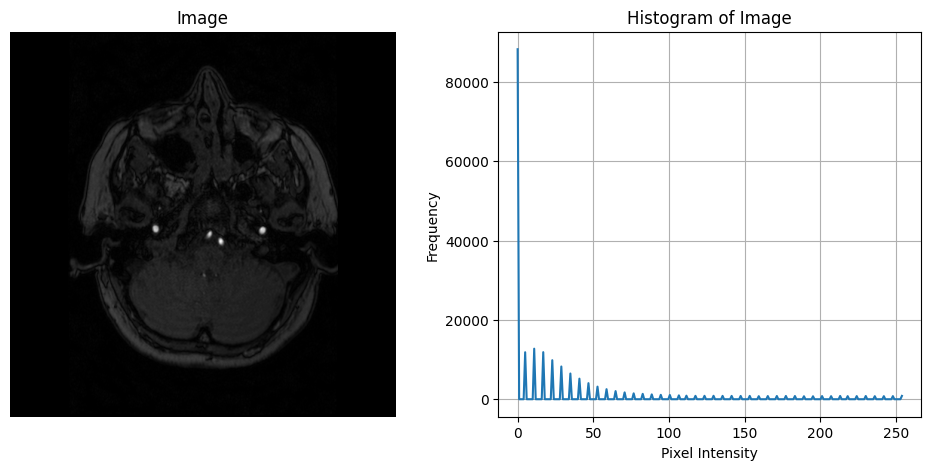

In [22]:
PixelType = itk.F  # Float
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]

# Read the input image
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName('images/Circle of Willis/1-125.dcm')
reader.SetFileName('images/Circle of Willis/1-138.dcm')
reader.SetFileName('images/Circle of Willis/1-015.dcm')
reader.Update()

# Get the image data as a numpy array
image_np = itk.array_from_image(reader.GetOutput())

# Compute the histogram using numpy
histogram, bin_edges = np.histogram(image_np, bins=256, range=(0, 255))

# for i in range(10):
#     print(f"Bin {i}: Frequency = {histogram[i]}")

# Plot the histogram and image side by side
plt.figure(figsize=(12, 5))

# Plot the histogram
plt.subplot(1, 2, 2)
plt.plot(bin_edges[0:-1], histogram)
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()

# Plot the image
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image_np, cmap='gray')
plt.axis('off')

plt.show()



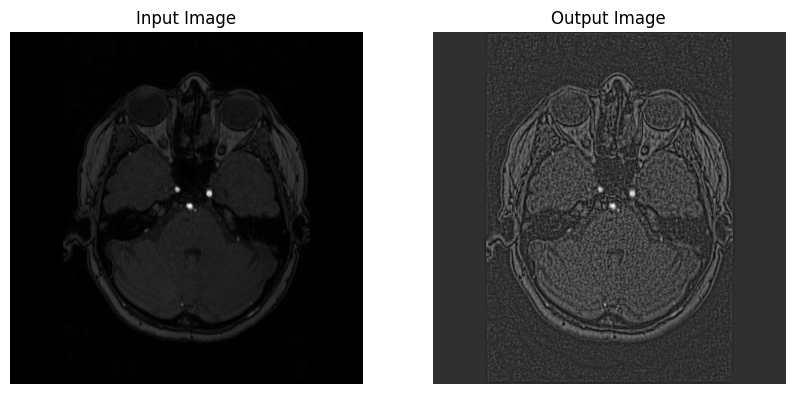

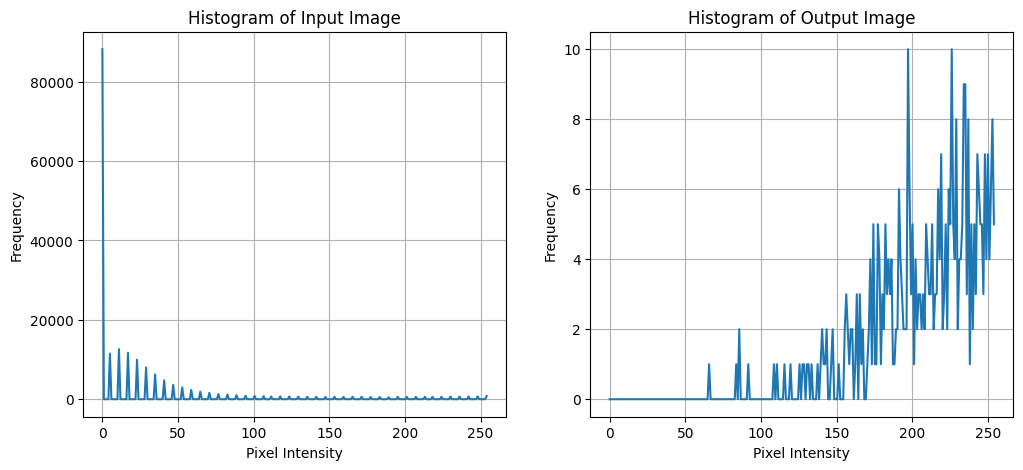

In [23]:
# Define dimensions and pixel type
Dimension = 2
PixelType = itk.F # Float type

# Create image types
ImageType = itk.Image[PixelType, Dimension]

# Read the input image
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName('images/Circle of Willis/1-035.dcm')
# reader.SetFileName('images/Covid Scans/Subject (1)/98.12.2/56364470.dcm')
reader.Update()

# Apply Adaptive Histogram Equalization filter
histogramEqualization = itk.AdaptiveHistogramEqualizationImageFilter.New(reader)
histogramEqualization.SetAlpha(0.45)  
histogramEqualization.SetBeta(0.6) 

# Set radius
radius = itk.Size[Dimension]()
radius.Fill(4)
histogramEqualization.SetRadius(radius)
histogramEqualization.Update()

# Convert the input and output images to arrays 
input_image_np = itk.array_from_image(reader.GetOutput())
output_image_np = itk.array_from_image(histogramEqualization.GetOutput())


# Plot the input and output images
plt.figure(figsize=(10, 5))

# Plot the input image
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(input_image_np, cmap='gray')
plt.axis('off')

# Plot the output image
plt.subplot(1, 2, 2)
plt.title("Output Image")
plt.imshow(output_image_np, cmap='gray')
plt.axis('off')
plt.show()

histogram1, bin_edges1 = np.histogram(input_image_np, bins=256, range=(0, 255))
histogram2, bin_edges2 = np.histogram(output_image_np, bins=256, range=(0, 255))

# Plot the histogram and image side by side

plt.figure(figsize=(12, 5))
# Plot the histogram
plt.subplot(1, 2, 1)
plt.plot(bin_edges1[0:-1], histogram1)
plt.title('Histogram of Input Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()

# Plot the image
plt.subplot(1, 2, 2)
plt.plot(bin_edges2[0:-1], histogram2)
plt.title('Histogram of Output Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()

plt.show()



Entropy

In [24]:
PixelType = itk.F 
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]

# Read the input image
# reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName('images/Circle of Willis/1-015.dcm')
# reader.SetFileName('images/Covid Scans/Subject (1)/98.12.2/56364470.dcm')

reader.Update()

# Get the image data as a NumPy array
image_np = itk.array_from_image(reader.GetOutput())

# Function to compute entropy from a histogram
def compute_entropy(histogram):
    total_freq = np.sum(histogram)
    entropy = 0.0
    for freq in histogram:
        if freq > 0:
            prob = freq / total_freq
            entropy += - prob * np.log2(prob)
    return entropy

# Compute the histogram using the previous method (from the previous example)
histogram_256, _ = np.histogram(image_np, bins=256, range=(0, 255))
histogram_128, _ = np.histogram(image_np, bins=128, range=(0, 255))
histogram_64, _ = np.histogram(image_np, bins=64, range=(0, 255))
histogram_4, _ = np.histogram(image_np, bins=4, range=(0, 255))

# Compute the entropy based on the histogram
entropy_256 = compute_entropy(histogram_256)
print(f"Image Entropy for 256 bins = {entropy_256} bits")

entropy_128 = compute_entropy(histogram_128)
print(f"Image Entropy for 128 bins = {entropy_128} bits")

entropy_64 = compute_entropy(histogram_64)
print(f"Image Entropy for 64 bins = {entropy_64} bits")

entropy_4 = compute_entropy(histogram_4)
print(f"Image Entropy for 4 bins = {entropy_4} bits")


Image Entropy for 256 bins = 3.4903057869622613 bits
Image Entropy for 128 bins = 3.4903057869622613 bits
Image Entropy for 64 bins = 3.4903057869622613 bits
Image Entropy for 4 bins = 0.8821767164553646 bits


Mutual Informaton

Mutual Information = 0.6115894911528845
Normalized Mutual information = 0.6256031869252487
Normalized Mutual information = 1.4551838166196498


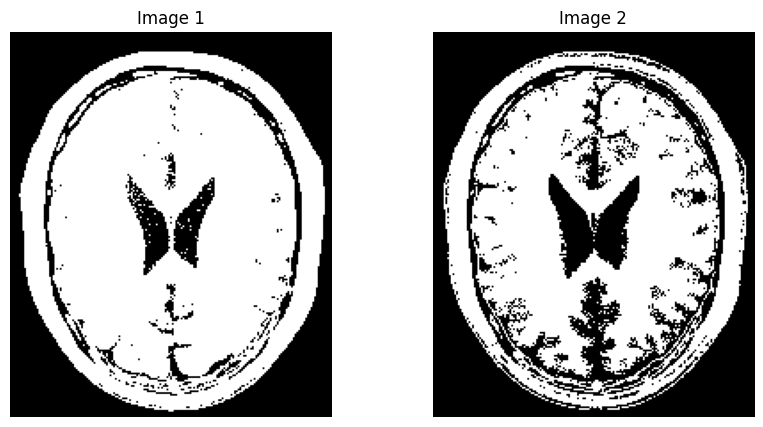

In [25]:
from scipy import stats

def compute_entropy(prob_dist):
    entropy = -np.sum(prob_dist * np.log2(prob_dist + np.finfo(float).eps))
    return entropy

def joint_entropy(joint_prob_dist):
    return compute_entropy(joint_prob_dist.flatten())

def mutual_information(img1, img2, bins=256):
    
    # Joint histogram of the images
    joint_hist, _, _ = np.histogram2d(img1.ravel(), img2.ravel(), bins=bins)

    # Normalize the histogram to get the joint probability distribution
    joint_prob_dist = joint_hist / np.sum(joint_hist)

    # Compute marginal probability distributions
    fixed_prob_dist = np.sum(joint_prob_dist, axis = 1) 
    moving_prob_dist = np.sum(joint_prob_dist, axis = 0) 

    # Calculate entropies
    H_1 = compute_entropy(fixed_prob_dist)
    
    H_2 = compute_entropy(moving_prob_dist)
    
    H_joint = joint_entropy(joint_prob_dist)

    # Mutual Information
    MI = H_1 + H_2 - H_joint
    MI_norm = 2 * MI / (H_1 + H_2)
    norm_MI = (H_1 + H_2) / H_joint   

    return MI, MI_norm, norm_MI

# Read two images using ITK
image1_np = itk.array_from_image(itk.imread('images/ThresholdedImage1.png'))
image2_np = itk.array_from_image(itk.imread('images/ThresholdedImage.png'))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1_np, cmap='gray')
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2_np, cmap='gray')
plt.axis('off')
plt.title('Image 2')

# Calculate Mutual Information
mi_value, mi_norm, norm_mi = mutual_information(image1_np, image2_np)
print(f"Mutual Information = {mi_value}")
print(f"Normalized Mutual information = {mi_norm}")
print(f"Normalized Mutual information = {norm_mi}")


Mutual Information = 0.9792156485828035
Normalized Mutual information = 1.0
Normalized Mutual information = 2.0


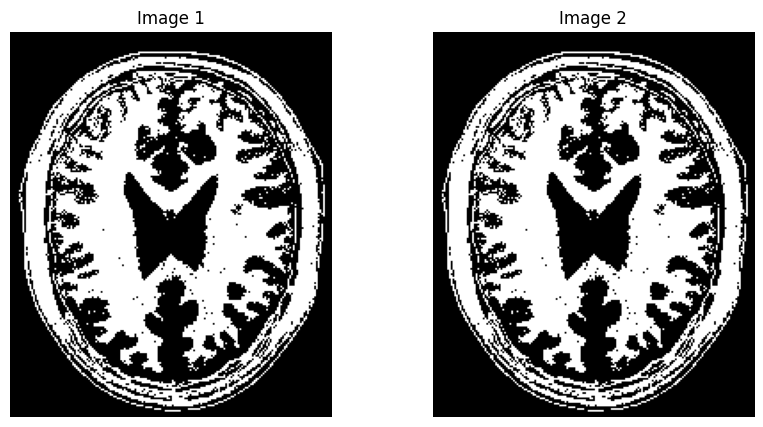

In [29]:
# Read two images using ITK
image1_np = itk.array_from_image(itk.imread('images/ThresholdedImage2.png'))
image2_np = itk.array_from_image(itk.imread('images/ThresholdedImage2.png'))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1_np, cmap='gray')
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2_np, cmap='gray')
plt.axis('off')
plt.title('Image 2')

# Calculate Mutual Information
mi_value, mi_norm, norm_mi = mutual_information(image1_np, image2_np)
print(f"Mutual Information = {mi_value}")
print(f"Normalized Mutual information = {mi_norm}")
print(f"Normalized Mutual information = {norm_mi}")
